# Data Misc
The GOSTrocks.dataMisc module provides simplified access to (usually) public datasets

In [1]:
import sys, os, urllib3
import rasterio

import pandas as pd
import geopandas as gpd

sys.path.insert(0, "../src")

import GOSTrocks.rasterMisc as rMisc
import GOSTrocks.dataMisc as dMisc
import GOSTrocks.mapMisc as mapMisc

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)


%load_ext autoreload
%autoreload 2

# Map World Bank boundaries

In [5]:
wb_gad_service = "https://services.arcgis.com/iQ1dY19aHwbSDYIF/arcgis/rest/services/World_Bank_Global_Administrative_Divisions/FeatureServer"
adm0 = dMisc.gdf_esri_service(wb_gad_service, layer=1, verify_ssl=False)
adm1 = dMisc.gdf_esri_service(wb_gad_service, layer=2, verify_ssl=False)
adm0_lines = dMisc.gdf_esri_service(wb_gad_service, layer=0, verify_ssl=False)

[68.18502601  6.75693223 97.16525597 33.25636367]


c:\WBG\Work\Code\GOSTrocks\notebooks\../src\GOSTrocks\mapMisc.py:169: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  adm0_ndlsa_buffer['geometry'] = adm0_ndlsa_buffer.geometry.buffer(0.01)
c:\WBG\Work\Code\GOSTrocks\notebooks\../src\GOSTrocks\mapMisc.py:177: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  new_colours = ndlsa_bad_colours.groupby("FID_left").apply(lambda row: row.loc[:, ['r_val_right', 'g_val_right', 'b_val_right', 'a_val_right']].mean()).reset_index()


SSLError: HTTPSConnectionPool(host='services.arcgis.com', port=443): Max retries exceeded with url: /iQ1dY19aHwbSDYIF/arcgis/rest/services/World_Bank_Global_Administrative_Divisions/FeatureServer/?f=pjson (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1017)')))

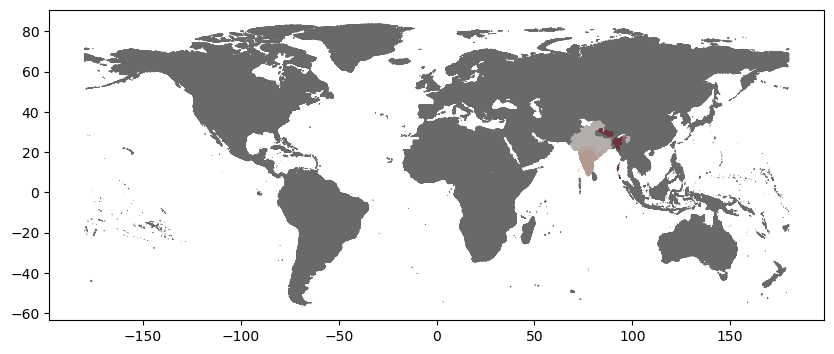

In [6]:
iso3 = 'IND'
sel_adm1 = adm1.loc[adm1['ISO_A3'] == iso3]
print(sel_adm1.total_bounds)
box = sel_adm1.total_bounds
#box = [73, 30, 83, 37]
xx = mapMisc.static_map_vector(sel_adm1, 'FID', add_basemap=False, add_wb_borders_lines=True, iso3=iso3, 
                               legend_loc="upper left", bbox=box)

In [ ]:
iso3 = 'IND'
sel_adm1 = adm1.loc[adm1['ISO_A3'] == iso3]
color_list, ndlsa_bad_colours, adm0_ndlsa = mapMisc.static_map_vector(sel_adm1, 'FID', add_basemap=False, add_wb_borders_lines=True, iso3=iso3, legend_loc="upper left")#, bbox = [72, 31, 82, 39])

In [ ]:
color_list

In [ ]:
ndlsa_bad_colours.loc[:,['NAM_0_left', 'NAM_0_right', 'NAM_1', 'FID_left', 'r_val_left', 'g_val_left', 'b_val_left', 'a_val_left','FID_right','r_val_right', 'g_val_right', 'b_val_right', 'a_val_right']].sort_values('NAM_0_left')

In [ ]:
adm0_ndlsa.head()

In [ ]:
adm0_ndlsa.loc[new_colours.index]

In [ ]:
xx.groupby("FID_left").apply(lambda row: row.loc[:, ['r_val_right', 'g_val_right', 'b_val_right', 'a_val_right']].mean()).reset_index()

In [ ]:
# Geobounadries is a great website for obtaining adiminstrative boundaries
adm1 = dMisc.get_geoboundaries("KEN", level='ADM1')
adm1.unary_union

In [ ]:
# World cover from ESA is a global landcover dataset
worldcover_tiles = dMisc.get_worldcover(adm1, "C:/temp", print_command=False, verbose=True)
# This function downloads the tiles and creates a vrt file
worldcover_vrt = os.path.join("C:/temp", "WorldCover.vrt")
xx = rasterio.open(worldcover_vrt)
xx.bounds

In [ ]:
# Simple map of a single tile
temp = rasterio.open(worldcover_tiles[1])
mapMisc.static_map_raster(temp, thresh=[10,20,30,40,50,60,70,80,90,95,100])